In [ ]:
import pandas as pd

d = {'col1': [1, 2, 3, 0, 7], 'col2': [4, 5, 6, 9, 5], 'col3': [7, 8, 12, 1, 11]}

df = pd.DataFrame(data=d)

print(df)

count_column = df.shape[1]
count_row = df.shape[0]
print("column and row count")
print(str(count_column) + " x " + str(count_row))

print(df.shape)
print(df['col1'])


   col1  col2  col3
0     1     4     7
1     2     5     8
2     3     6    12
3     0     9     1
4     7     5    11
column and row count
3 x 5
(5, 3)
0    1
1    2
2    3
3    0
4    7
Name: col1, dtype: int64


In [24]:
import pandas as pd
import numpy as np


d = {'Average_pulse' : [80, 85, 90, 95, 100, 105, 110, 115, 120, 125], 'Calorie_burnage': [240, 250, 260, 270, 280, 290, 300, 310, 320, 330]}

df = pd.DataFrame(data=d)

print(df)

Average_pulse_max = max(df['Average_pulse'])
print (Average_pulse_max)

Average_pulse_min = min(df['Average_pulse'])
print (Average_pulse_min)

Average_calorie_burnage = np.mean(df['Calorie_burnage'])
print(Average_calorie_burnage)

   Average_pulse  Calorie_burnage
0             80              240
1             85              250
2             90              260
3             95              270
4            100              280
5            105              290
6            110              300
7            115              310
8            120              320
9            125              330
125
80
285.0


        Duration  Average_Pulse   Max_Pulse  Calorie_Burnage  Hours_Work  \
count  10.000000      10.000000   10.000000        10.000000   10.000000   
mean   51.000000     102.500000  137.000000       285.000000    6.600000   
std    10.488088      15.138252   11.352924        30.276504    3.627059   
min    30.000000      80.000000  120.000000       240.000000    0.000000   
25%    45.000000      91.250000  130.000000       262.500000    7.000000   
50%    52.500000     102.500000  140.000000       285.000000    8.000000   
75%    60.000000     113.750000  145.000000       307.500000    8.000000   
max    60.000000     125.000000  150.000000       330.000000   10.000000   

       Hours_Sleep  
count    10.000000  
mean      7.500000  
std       0.527046  
min       7.000000  
25%       7.000000  
50%       7.500000  
75%       8.000000  
max       8.000000  


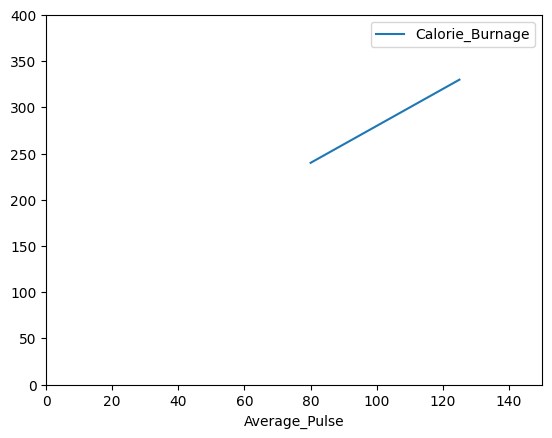

[ 2. 80.]
120.0
                 Duration  Average_Pulse  Max_Pulse  Calorie_Burnage  \
Duration             1.00           0.42       0.52             0.42   
Average_Pulse        0.42           1.00       0.97             1.00   
Max_Pulse            0.52           0.97       1.00             0.97   
Calorie_Burnage      0.42           1.00       0.97             1.00   
Hours_Work          -0.63          -0.42      -0.56            -0.42   
Hours_Sleep          0.30           0.87       0.84             0.87   

                 Hours_Work  Hours_Sleep  
Duration              -0.63         0.30  
Average_Pulse         -0.42         0.87  
Max_Pulse             -0.56         0.84  
Calorie_Burnage       -0.42         0.87  
Hours_Work             1.00        -0.17  
Hours_Sleep           -0.17         1.00  


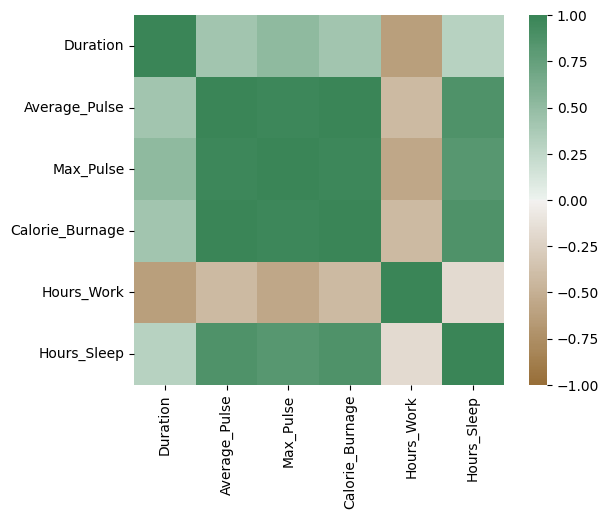

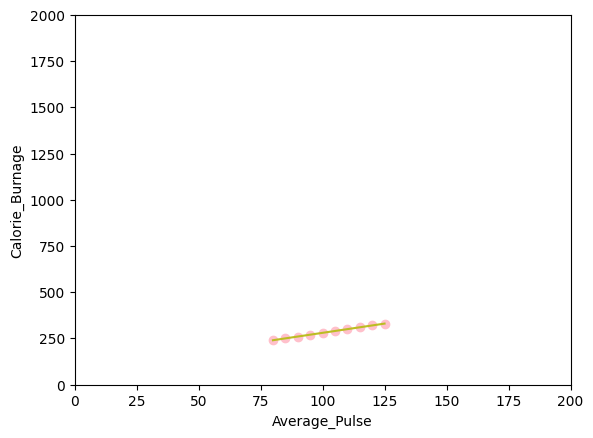

NameError: name 'sys' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats


health_data = pd.read_csv("data.csv", header=0, sep=",")
health_data.dropna(axis=0,inplace=True)
#print(health_data)

health_data["Average_Pulse"] = health_data['Average_Pulse'].astype(float)
health_data["Max_Pulse"] = health_data["Max_Pulse"].astype(float)

#print (health_data.info())
print(health_data.describe())

health_data.plot(x ='Average_Pulse', y='Calorie_Burnage', kind='line')
plt.ylim(ymin=0, ymax=400)
plt.xlim(xmin=0, xmax=150)

plt.show()

x = health_data["Average_Pulse"]
y = health_data["Calorie_Burnage"]
slope_intercept = np.polyfit(x,y,1)

print(slope_intercept)

Max_Pulse= health_data["Max_Pulse"]
percentile10 = np.percentile(Max_Pulse, 10)
print(percentile10)

Corr_Matrix = round(health_data.corr(),2)
print(Corr_Matrix)

correlation_full_health = health_data.corr()

axis_corr = sns.heatmap(
correlation_full_health,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
 return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y, color='pink')
plt.plot(x, mymodel, color='tab:olive')
plt.ylim(ymin=0, ymax=2000)
plt.xlim(xmin=0, xmax=200)
plt.xlabel("Average_Pulse")
plt.ylabel ("Calorie_Burnage")
plt.show()

#Two lines to make our compiler able to draw:
#plt.savefig(sys.stdout.buffer)
#sys.stdout.flush()
